### Written by Sharon Dill
#### April 2022

In [1]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# read in file
df = pd.read_excel('wordle_experiment.xlsx')
df.head()
df.info()

,Date,Round,Attempt,Score,Player,Word,Guess
0,2022-03-10,1,1,3,Player A,lapse,steam
1,2022-03-11,1,2,4,Player A,watch,steam
2,2022-03-12,1,3,4,Player A,today,steam
3,2022-03-13,1,4,5,Player A,focus,steam
4,2022-03-14,1,5,2,Player A,smelt,steam


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     86 non-null     datetime64[ns]
 1   Round    86 non-null     int64         
 2   Attempt  86 non-null     int64         
 3   Score    86 non-null     int64         
 4   Player   86 non-null     object        
 5   Word     86 non-null     object        
 6   Guess    86 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.8+ KB


In [3]:
# round 5 contained days where scoring was messed up
df = df.dropna(inplace = False)
df = df[df['Round'] != 5]
df['Score'] = df['Score'].astype(int)

### Use Word With Friends letter values <br>
Will calculate word difficulty using Word With Friends letter values.<br>
- The five letter values per word will be added together to derive a word difficulty score.
- Note that a repeating letter will add one point per repeat to the word difficulty score.
- Example: the word ALLOW has a difficulty of 12 with the repeating L adding one more point



In [4]:
# use a dictionary for letter point value
# a is worth 1 point, c is worth 4 points, etc
worth = {"a": 1, "c": 4, "b": 4, "e": 1, "d": 2, "g": 3, 
     "f": 4, "i": 1, "h": 3, "k": 5, "j": 10, "m": 4, 
     "l": 2, "o": 1, "n": 2, "q": 10, "p": 4, "s": 1, 
     "r": 1, "u": 2, "t": 1, "w": 4, "v": 5, "y": 3, 
     "x": 8, "z": 10}

# will calculate the difficulty per daily word
def calc_difficulty(word):
    total = 0
    #print(word)
    for letter in word:
        # add up points per letter
        total += worth[letter]
        # if there is more than one occurrence of letter, add a point
        if word.count(letter) > 1:
            total += 1

    return total

In [5]:
# check accuracy - tease is one point per letter and two e's = 7 points
df['difficulty'] = df['Word'].map(calc_difficulty)
df.head(10)

,Date,Round,Attempt,Score,Player,Word,Guess,difficulty
0,2022-03-10,1,1,3,Player A,lapse,steam,9
1,2022-03-11,1,2,4,Player A,watch,steam,13
2,2022-03-12,1,3,4,Player A,today,steam,8
3,2022-03-13,1,4,5,Player A,focus,steam,12
4,2022-03-14,1,5,2,Player A,smelt,steam,9
5,2022-03-15,1,6,4,Player A,tease,steam,7
6,2022-03-16,1,7,4,Player A,cater,steam,8
7,2022-03-17,1,8,3,Player A,movie,steam,12
8,2022-03-18,1,9,3,Player A,saute,steam,6
9,2022-03-19,1,10,6,Player A,allow,steam,12


In [6]:
# putting word difficulty into categories
df['Type'] = '4 Very Hard'
df['Type'] = np.where(df['difficulty'] < 14, '3 Hard', df['Type'])
df['Type'] = np.where(df['difficulty'] < 11, '2 Medium', df['Type'])
df['Type'] = np.where(df['difficulty'] < 8, '1 Easy', df['Type'])
df.head(10)

,Date,Round,Attempt,Score,Player,Word,Guess,difficulty,Type
0,2022-03-10,1,1,3,Player A,lapse,steam,9,2 Medium
1,2022-03-11,1,2,4,Player A,watch,steam,13,3 Hard
2,2022-03-12,1,3,4,Player A,today,steam,8,2 Medium
3,2022-03-13,1,4,5,Player A,focus,steam,12,3 Hard
4,2022-03-14,1,5,2,Player A,smelt,steam,9,2 Medium
5,2022-03-15,1,6,4,Player A,tease,steam,7,1 Easy
6,2022-03-16,1,7,4,Player A,cater,steam,8,2 Medium
7,2022-03-17,1,8,3,Player A,movie,steam,12,3 Hard
8,2022-03-18,1,9,3,Player A,saute,steam,6,1 Easy
9,2022-03-19,1,10,6,Player A,allow,steam,12,3 Hard


In [7]:
# breakdown of difficulty
df['Type'].value_counts()
df['Type'].value_counts(normalize = True)

2 Medium       30
3 Hard         26
4 Very Hard    16
1 Easy          8
Name: Type, dtype: int64

2 Medium      0.38
3 Hard        0.33
4 Very Hard   0.20
1 Easy        0.10
Name: Type, dtype: float64

In [8]:
# there is a list of 12k five letter words, but many are obscure
# goodmaster is the list of words used by nyt - 2308 words
goodmaster = pd.read_csv('nyt wordle good words.txt', header = 0, names = ['Word'])

In [9]:
# calculate the difficulty of list of possible words
goodmaster['difficulty'] = goodmaster['Word'].map(calc_difficulty)
goodmaster.head()

,Word,difficulty
0,rebut,9
1,sissy,10
2,humph,18
3,awake,14
4,blush,12


In [10]:
# put into category
goodmaster['Type'] = '4 Very Hard'
goodmaster['Type'] = np.where(goodmaster['difficulty'] < 14, '3 Hard', goodmaster['Type'])
goodmaster['Type'] = np.where(goodmaster['difficulty'] < 11, '2 Medium', goodmaster['Type'])
goodmaster['Type'] = np.where(goodmaster['difficulty'] < 8, '1 Easy', goodmaster['Type'])

goodmaster['Type'].value_counts(normalize = True)

2 Medium      0.40
3 Hard        0.35
4 Very Hard   0.18
1 Easy        0.07
Name: Type, dtype: float64

In [11]:
# what are some of the hardest words
goodmaster[goodmaster['difficulty'] > 27]


,Word,difficulty,Type
1214,pizza,28,4 Very Hard
1626,fuzzy,31,4 Very Hard
1713,dizzy,28,4 Very Hard
1716,jazzy,36,4 Very Hard
1983,fizzy,30,4 Very Hard


In [12]:
def possibilities(guess, word):
    green = []
    yellow = []
    gray = []
    # ---------------------------------------------
    # will take the players word guess and create a regex
    # to match which letters are in the right place
    # compared to the word of the day.
    # a period represents no match
    # ----------------------------------------------
    for x, letter in enumerate(guess):
        if letter in set(word):
            if (letter == word[x]): #set matching letter to green
                green.append(letter)
            else:                   #set . for non match
                yellow.append(letter)
                green.append('.')
        else:
            green.append('.') #set . for non match
            gray.append(letter)
    # create regex to compare to master list
    regex = ''.join([str(z) for z in green])
    
    # ---------------------------------------------
    # takes regex with letters in the right place
    # and finds how many words match the regex
    # ---------------------------------------------
    
    green_list = [] #will be used to whittle down possible words
    for x in word_list:
        if re.search(regex, x): # see if word matches regex
            green_list.append(x)
    yellow_list = []
    # Check new_list for words that do contain all yellow letters
    for word in green_list:
        if len(yellow) > 0:
            # if a yellow letter exists
            length = len(yellow) 
            x = 0
            for letter in yellow:
                if letter in word:
                    x += 1
            if length == x:
                yellow_list.append(word)
        else:
            yellow_list.append(word)
 
    gray_list = []
    # check yellow list for words with any gray letters
    for word in yellow_list:
        if len(gray) > 0:
            length = len(gray)
            x = 0
            for letter in gray:
                if letter in word:
                    x += 1
            if x == 0:
                gray_list.append(word)
        else:
            gray_list.append(word)
        
    final_list = []
    # remove any duplicates
    [final_list.append(x) for x in gray_list if x not in final_list]            

    counter = len(final_list)
    return(counter)
                


In [13]:
word_list = list(goodmaster['Word'])
# calculate the number of possible words based on the first guess
df['wordsRemain']= df.apply(lambda x: possibilities(x['Guess'],x['Word']), axis = 1)
df.head()

,Date,Round,Attempt,Score,Player,Word,Guess,difficulty,Type,wordsRemain
0,2022-03-10,1,1,3,Player A,lapse,steam,9,2 Medium,48
1,2022-03-11,1,2,4,Player A,watch,steam,13,3 Hard,110
2,2022-03-12,1,3,4,Player A,today,steam,8,2 Medium,18
3,2022-03-13,1,4,5,Player A,focus,steam,12,3 Hard,119
4,2022-03-14,1,5,2,Player A,smelt,steam,9,2 Medium,1


In [14]:
# write out files for laster use
df.to_csv('WordleExperiment2022.csv', header = True, index = False)
goodmaster.to_csv('WordleMasterFinal.csv', header = True, index = False)

### Footnote
Example of how **wordsRemain** was calculated.  Starting word is SPEAK and the word to guess is EPOXY.  This results is a **wordsRemain** value of 4 words.  You can see that the remaining words must have a P in the second position (green), must have an E somewhere in the word (yellow) and cannot have an S, A or K (gray).


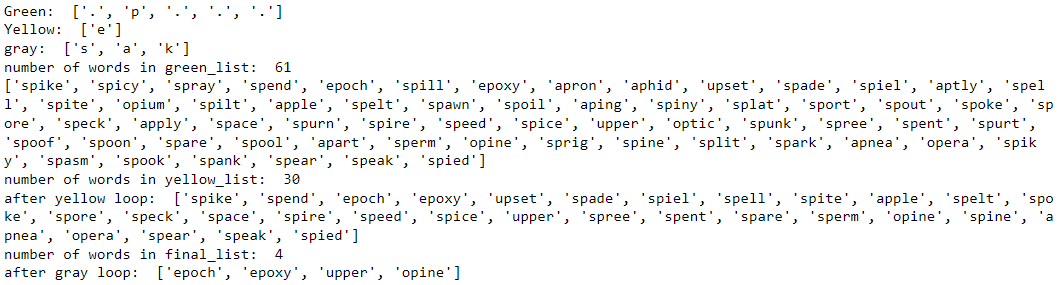